In [ ]:
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
import geopandas as gpd
from shapely.geometry import LineString
import networkx as nx
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
airports = pd.read_csv("/content/drive/My Drive/airports.dat", delimiter=',', names=['id', 'name', 'city', 'country', 'iata',
                                                                   'icao', 'lat', 'long', 'altitude', 'timezone',
                                                                   'dst', 'tz', 'type', 'source'])
routes = pd.read_csv("/content/drive/My Drive/routes.dat", delimiter=',', names=['airline', 'id', 'source_airport', 'source_airport_id',
                                                               'destination_airport', 'destination_airport_id', 'codeshare',
                                                               'stops', 'equitment'])

In [ ]:
airports.head()

,id,name,city,country,iata,icao,lat,long,altitude,timezone,dst,tz,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [ ]:
routes.head()

,airline,id,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,stops,equitment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


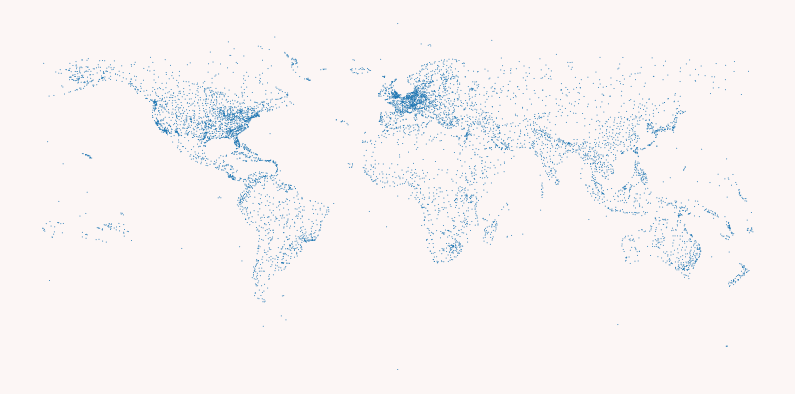

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)

ax.scatter(airports['long'], airports['lat'], s=1, alpha=1, edgecolors='none')
ax.axis('off')

plt.show()

In [ ]:
source_airports = airports[['name', 'iata', 'icao', 'lat', 'long']]
destination_airports = source_airports.copy()
source_airports.columns = [str(col) + '_source' for col in source_airports.columns]
destination_airports.columns = [str(col) + '_destination' for col in destination_airports.columns]
routes = routes[['source_airport', 'destination_airport']]
routes = pd.merge(routes, source_airports, left_on='source_airport', right_on='iata_source')
routes = pd.merge(routes, destination_airports, left_on='destination_airport', right_on='iata_destination')

geometry = [LineString([[routes.iloc[i]['long_source'], routes.iloc[i]['lat_source']], [routes.iloc[i]['long_destination'], routes.iloc[i]['lat_destination']]]) for i in range(routes.shape[0])]
routes = gpd.GeoDataFrame(routes, geometry=geometry, crs='EPSG:4326')
print(routes)

      source_airport destination_airport                       name_source  \
0                AER                 KZN       Sochi International Airport   
1                ASF                 KZN                 Astrakhan Airport   
2                CEK                 KZN     Chelyabinsk Balandino Airport   
3                DME                 KZN  Domodedovo International Airport   
4                DME                 KZN  Domodedovo International Airport   
...              ...                 ...                               ...   
66929            ZKE                 YFA               Kashechewan Airport   
66930            YPO                 YAT                 Peawanuck Airport   
66931            ZKE                 YAT               Kashechewan Airport   
66932            JCK                 RCM               Julia Creek Airport   
66933            TRO                 GFN                     Taree Airport   

      iata_source icao_source  lat_source  long_source  \
0    

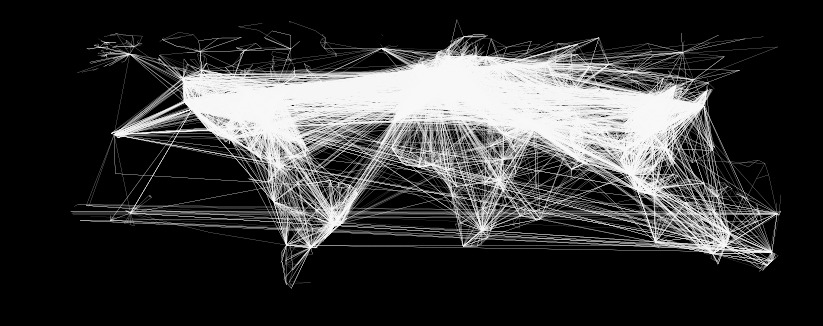

In [ ]:
fig = plt.figure(facecolor='black')
ax = plt.axes()

fig.set_size_inches(14, 7)
ax.patch.set_facecolor('black')

routes.plot(ax=ax, color='white', linewidth=0.1)

plt.setp(ax.spines.values(), color='black')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='black')

plt.show()

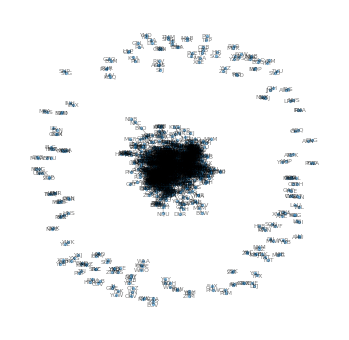

In [21]:
routes = pd.read_csv("/content/drive/My Drive/routes.dat", delimiter=',', names=['airline', 'id', 'source_airport', 'source_airport_id',
                                                               'destination_airport', 'destination_airport_id', 'codeshare',
                                                               'stops', 'equitment'])
edges = routes.iloc[::20, :][['source_airport', 'destination_airport']].values
g = nx.from_edgelist(edges)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(g, ax=ax, node_size=5,
                 font_size=6, alpha=.5,
                 width=.5)
ax.set_axis_off()

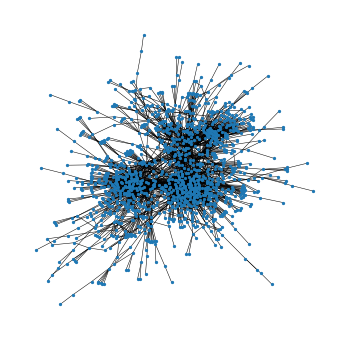

In [22]:
sg = next(g.subgraph(c).copy() for c in nx.connected_components(g))
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(sg, ax=ax, with_labels=False,
                 node_size=5, width=.5)
ax.set_axis_off()

NetworkXError: ignored

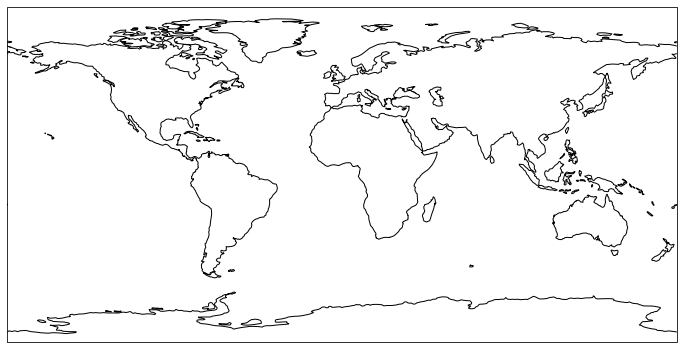

In [23]:
airports = pd.read_csv("/content/drive/My Drive/airports.dat", delimiter=',', names=['id', 'name', 'city', 'country', 'iata',
                                                                   'icao', 'lat', 'long', 'altitude', 'timezone',
                                                                   'dst', 'tz', 'type', 'source'])
pos = {airport: (v['long'], v['lat'])
       for airport, v in
       airports.to_dict('index').items()}
deg = nx.degree(sg)
sizes = [5 * deg[iata] for iata in sg.nodes]
altitude = airports['altitude']
altitude = [airports.loc[airports['iata'] == iata]['altitude'].values for iata in sg.nodes]
labels = {iata: iata if deg[iata] >= 20 else ''
          for iata in sg.nodes}
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(
    1, 1, figsize=(12, 8),
    subplot_kw=dict(projection=crs))
ax.coastlines()
# Extent of continental US.
nx.draw_networkx(sg, ax=ax,
                 font_size=16,
                 alpha=.5,
                 width=.075,
                 node_size=sizes,
                 labels=labels,
                 pos=pos,
                 node_color=altitude,
                 cmap=plt.cm.autumn)